In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import required llibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
# import Housing.csv
housing_dataSet = pd.read_csv('train.csv')
housing_dataSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the data set
housing_dataSet.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# For missing null value
housing_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing_dataSet.shape

(1460, 81)

To Analysis the data we will be doing univariate and bivariate analysis

# Univariate Analysis  -

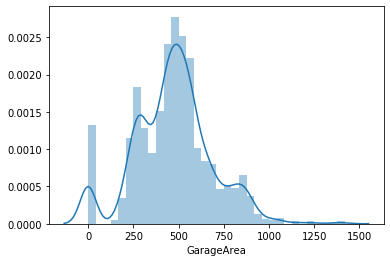

In [6]:
sns.distplot(housing_dataSet['GarageArea'])
plt.show()

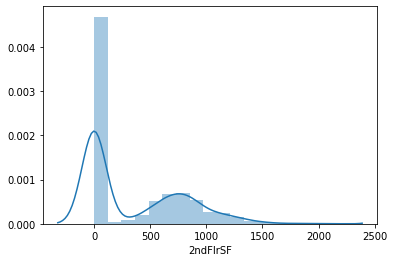

In [7]:
sns.distplot(housing_dataSet['2ndFlrSF'])
plt.show()

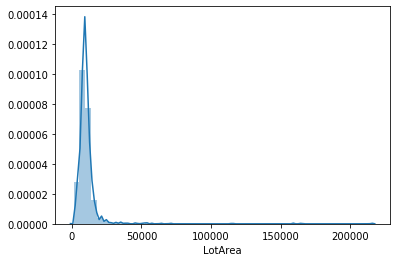

In [8]:
sns.distplot(housing_dataSet['LotArea'])
plt.show()

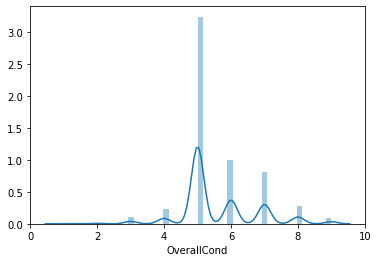

In [9]:
sns.distplot(housing_dataSet['OverallCond'])
plt.show()

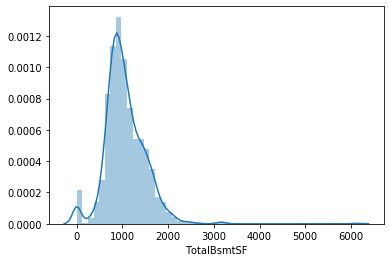

In [10]:
sns.distplot(housing_dataSet['TotalBsmtSF'])
plt.show()

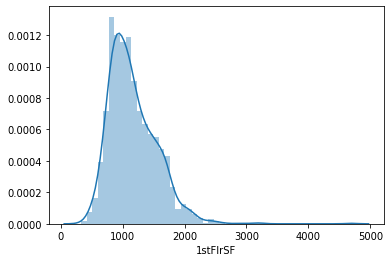

In [11]:
sns.distplot(housing_dataSet['1stFlrSF'])
plt.show()

# Bivariate analysis

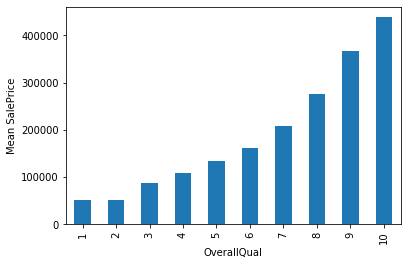

In [12]:
var = housing_dataSet.groupby("OverallQual").SalePrice.mean()
plt.xlabel('Overall Quality')
plt.ylabel('Mean SalePrice')
var.plot(kind='bar')
plt.show()

We can see from the above plot that Mean Sale price increases when the rating increaes.

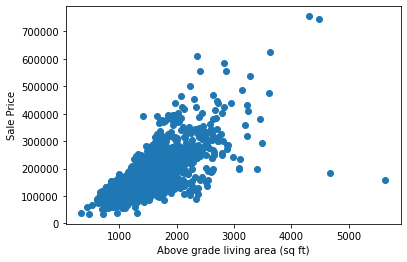

In [13]:
plt.scatter(x=housing_dataSet['GrLivArea'], y=housing_dataSet['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade living area (sq ft)')
plt.show()

We can see linear realationship between above two

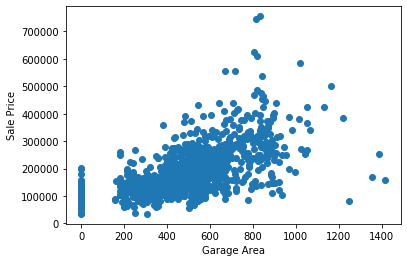

In [14]:
plt.scatter(x=housing_dataSet['GarageArea'],  y=housing_dataSet['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see linear realationship between above two

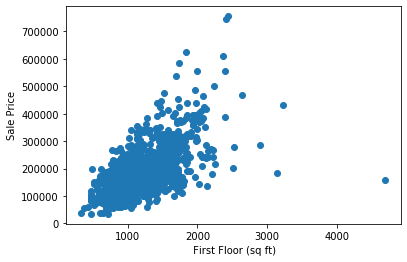

In [15]:
plt.scatter(x=housing_dataSet['1stFlrSF'],  y=housing_dataSet['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel(' First Floor (sq ft)')
plt.show()

We can see linear realationship between above two

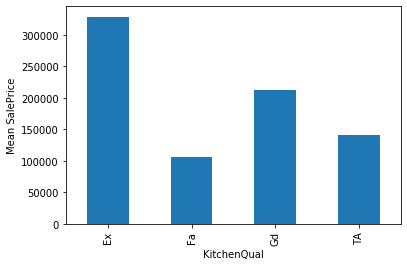

In [16]:
var = housing_dataSet.groupby("KitchenQual").SalePrice.mean()
plt.xlabel('Kitchen Quality')
plt.ylabel('Mean SalePrice')
var.plot(kind='bar')
plt.show()

For higher sale value kitchen quality is excellent 

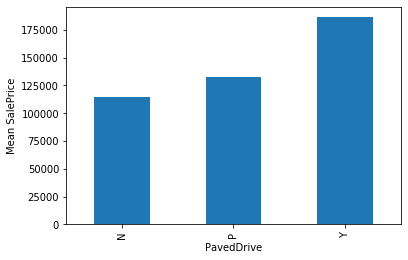

In [17]:
var = housing_dataSet.groupby("PavedDrive").SalePrice.mean()
plt.xlabel('Paved driveway')
plt.ylabel('Mean SalePrice')
var.plot(kind='bar')
plt.show()

PavedDrive increase when mean sale price increases.

- Now we will check the target variable.

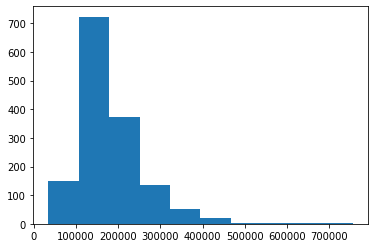

In [18]:
plt.hist(housing_dataSet.SalePrice)
plt.show()

In [19]:
# And skewness of target variable
housing_dataSet.SalePrice.skew()

1.8828757597682129

Target variable is right skewed with a skewness of 1.88, so it is not linear.

- Checking target variable on log scale

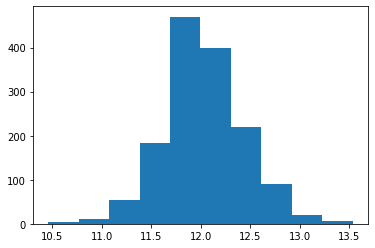

In [20]:
target = np.log(housing_dataSet.SalePrice)
plt.hist(target)
plt.show()

In [21]:
target.skew()

0.12133506220520406

Target variable can be made normally distributed by taking log scale so that its skewness becomes nearly 0. 

In [22]:
#Finding the percentage of missing values:-
percent_missing = housing_dataSet.isnull().sum() * 100 / len(housing_dataSet)
missing_value_df = pd.DataFrame({'column_name': housing_dataSet.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df) 

             column_name  percent_missing
PoolQC            PoolQC        99.520548
MiscFeature  MiscFeature        96.301370
Alley              Alley        93.767123
Fence              Fence        80.753425
FireplaceQu  FireplaceQu        47.260274
...                  ...              ...
ExterQual      ExterQual         0.000000
Exterior2nd  Exterior2nd         0.000000
Exterior1st  Exterior1st         0.000000
RoofMatl        RoofMatl         0.000000
SalePrice      SalePrice         0.000000

[81 rows x 2 columns]


- Replacing NA values on their respective value depending upon their dictionary 

In [23]:
housing_dataSet['Alley'].fillna('No Alley',inplace = True)
housing_dataSet['Alley'].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [24]:
housing_dataSet['BsmtQual'].fillna('No Basement Qual',inplace = True)
housing_dataSet['BsmtQual'].value_counts()

TA                  649
Gd                  618
Ex                  121
No Basement Qual     37
Fa                   35
Name: BsmtQual, dtype: int64

In [25]:
housing_dataSet['BsmtCond'].fillna('No Basement Qual',inplace = True)
housing_dataSet['BsmtCond'].value_counts()

TA                  1311
Gd                    65
Fa                    45
No Basement Qual      37
Po                     2
Name: BsmtCond, dtype: int64

In [26]:
housing_dataSet['BsmtExposure'].fillna('No Basement Expo',inplace = True)
housing_dataSet['BsmtExposure'].value_counts()

No                  953
Av                  221
Gd                  134
Mn                  114
No Basement Expo     38
Name: BsmtExposure, dtype: int64

In [27]:
housing_dataSet['BsmtFinType1'].fillna('No Basement Type1',inplace = True)
housing_dataSet['BsmtFinType1'].value_counts()

Unf                  430
GLQ                  418
ALQ                  220
BLQ                  148
Rec                  133
LwQ                   74
No Basement Type1     37
Name: BsmtFinType1, dtype: int64

In [28]:
housing_dataSet['BsmtFinType2'].fillna('No Basement Type2',inplace = True)
housing_dataSet['BsmtFinType2'].value_counts()

Unf                  1256
Rec                    54
LwQ                    46
No Basement Type2      38
BLQ                    33
ALQ                    19
GLQ                    14
Name: BsmtFinType2, dtype: int64

In [29]:
housing_dataSet['FireplaceQu'].fillna('No Fireplace',inplace = True)
housing_dataSet['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [30]:
housing_dataSet['GarageType'].fillna('No Garage Type',inplace = True)
housing_dataSet['GarageType'].value_counts()

Attchd            870
Detchd            387
BuiltIn            88
No Garage Type     81
Basment            19
CarPort             9
2Types              6
Name: GarageType, dtype: int64

In [31]:
housing_dataSet['GarageFinish'].fillna('No Garage Finish',inplace = True)
housing_dataSet['GarageFinish'].value_counts()

Unf                 605
RFn                 422
Fin                 352
No Garage Finish     81
Name: GarageFinish, dtype: int64

In [32]:
housing_dataSet['GarageQual'].fillna('No Garage Qual',inplace = True)
housing_dataSet['GarageQual'].value_counts()

TA                1311
No Garage Qual      81
Fa                  48
Gd                  14
Ex                   3
Po                   3
Name: GarageQual, dtype: int64

In [33]:
housing_dataSet['GarageCond'].fillna('No Garage Cond',inplace = True)
housing_dataSet['GarageCond'].value_counts()

TA                1326
No Garage Cond      81
Fa                  35
Gd                   9
Po                   7
Ex                   2
Name: GarageCond, dtype: int64

In [34]:
housing_dataSet['PoolQC'].fillna('No Pool',inplace = True)
housing_dataSet['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [35]:
housing_dataSet['Fence'].fillna('No Fence',inplace = True)
housing_dataSet['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [36]:
housing_dataSet['MiscFeature'].fillna('None',inplace = True)
housing_dataSet['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [36]:
#dropping the data which contains almost 90% same values(which does not give much information)
housing = housing_dataSet.drop(columns = ['Alley','BsmtCond','BsmtFinType2','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'],axis = 1)

FINDING THE null value again

In [37]:
#Finding the percentage of missing values:-
percent_missing = housing.isnull().sum() * 100 / len(housing)
missing_value_df = pd.DataFrame({'column_name': housing.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df) 

             column_name  percent_missing
LotFrontage  LotFrontage        17.739726
GarageYrBlt  GarageYrBlt         5.547945
MasVnrType    MasVnrType         0.547945
MasVnrArea    MasVnrArea         0.547945
Electrical    Electrical         0.068493
...                  ...              ...
BsmtFinSF1    BsmtFinSF1         0.000000
BsmtFinSF2    BsmtFinSF2         0.000000
BsmtUnfSF      BsmtUnfSF         0.000000
TotalBsmtSF  TotalBsmtSF         0.000000
SalePrice      SalePrice         0.000000

[73 rows x 2 columns]


# Outlier Treatment

In [38]:
numeric_cols = housing.select_dtypes(np.number)
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
numeric_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


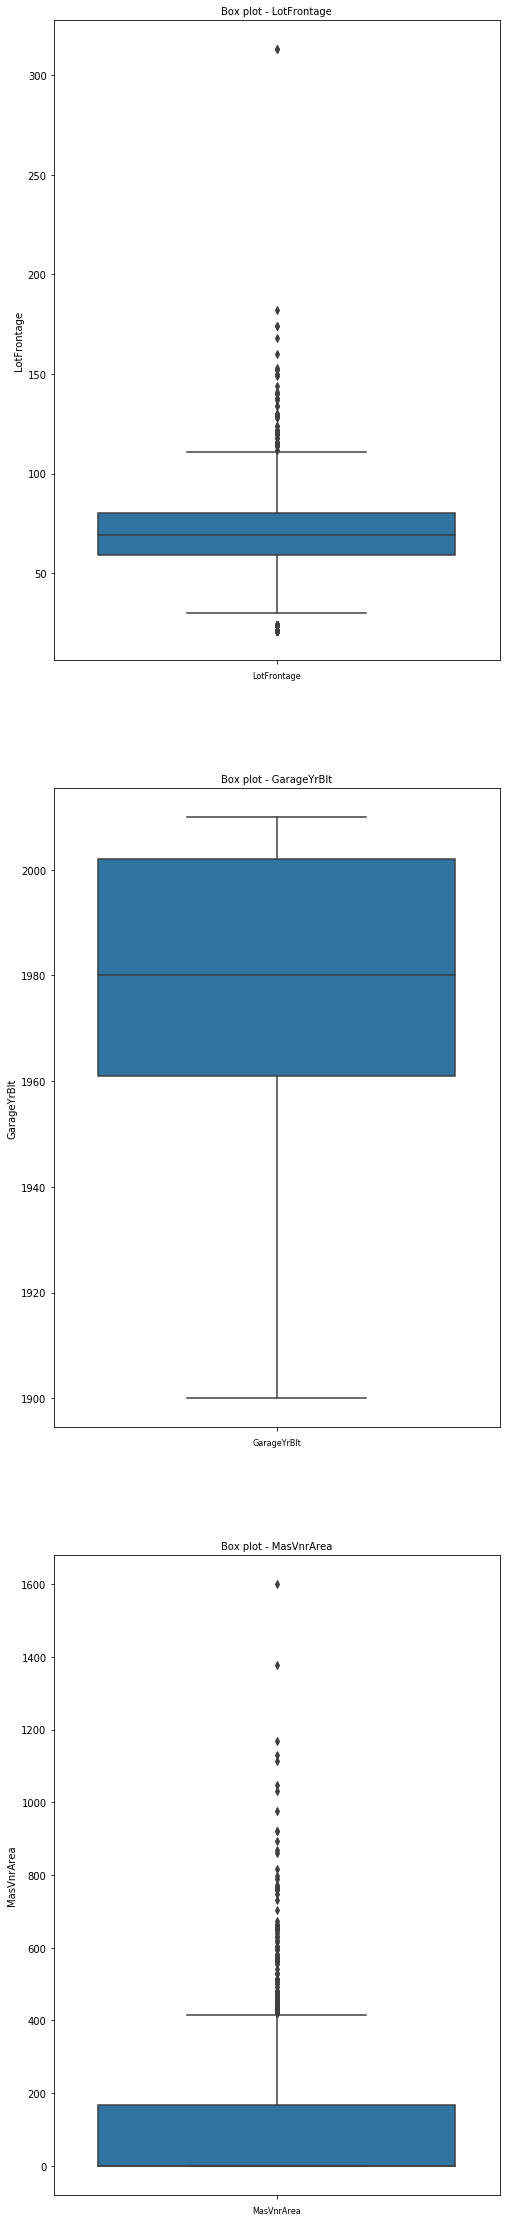

In [39]:
# boxplot for ouliers
col_names = ['LotFrontage','GarageYrBlt','MasVnrArea']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=housing[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [40]:
# numerical vars with missing imputing with median
columns = ['LotFrontage','MasVnrArea']
for cols in columns :
    housing[cols].fillna((housing[cols].median()), inplace=True)
# numerical vars without outliers imputing with mean
housing['GarageYrBlt'].fillna((housing['GarageYrBlt'].mean()), inplace=True)

In [41]:
#imputing categorical vars with mode

col = ['MasVnrType','Electrical']
for cols in col :
    housing = housing.fillna(housing.mode().iloc[0]) 


In [42]:
#checking if there any null values
sum(housing.isnull().sum() != 0)

0

In [43]:
# By Removig the outliers there are chances to remove the data that are needed.So caping the data 
col_names = housing.select_dtypes(np.number)
for col in col_names:
    percentiles = housing[col].quantile([0.01,0.99]).values
    housing[col][housing[col] <= percentiles[0]] = percentiles[0]
    housing[col][housing[col] >= percentiles[1]] = percentiles[1]

In [44]:
#dropping the data which contains almost 88% same values(which does not give much information)
housing = housing.drop(columns = ['Street','BldgType','LandContour','LandSlope','Utilities','Condition1','MSZoning','RoofStyle','RoofMatl','CentralAir','Electrical','Heating','SaleType'],axis = 1)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition2,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,15.59,60,65.0,8450.0,Reg,Inside,CollgCr,Norm,2Story,7,...,61.0,0.00,0,0.0,0,0,2,2008,Normal,208500.0
1,15.59,20,80.0,9600.0,Reg,FR2,Veenker,Norm,1Story,6,...,0.0,0.00,0,0.0,0,0,5,2007,Normal,181500.0
2,15.59,60,68.0,11250.0,IR1,Inside,CollgCr,Norm,2Story,7,...,42.0,0.00,0,0.0,0,0,9,2008,Normal,223500.0
3,15.59,70,60.0,9550.0,IR1,Corner,Crawfor,Norm,2Story,7,...,35.0,261.05,0,0.0,0,0,2,2006,Abnorml,140000.0
4,15.59,60,84.0,14260.0,IR1,FR2,NoRidge,Norm,2Story,8,...,84.0,0.00,0,0.0,0,0,12,2008,Normal,250000.0


In [45]:
housing.shape

(1460, 60)

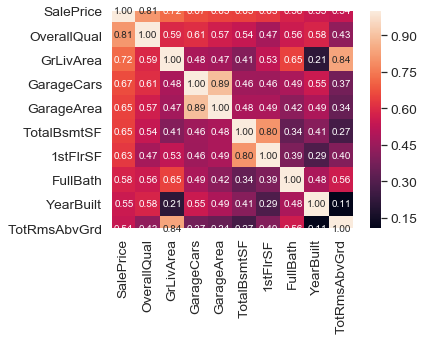

In [46]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = housing.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [47]:
#dropping the redundant columns
housing = housing.drop(columns = ['GarageCars','TotalBsmtSF','GrLivArea'],axis = 1)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition2,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,15.59,60,65.0,8450.0,Reg,Inside,CollgCr,Norm,2Story,7,...,61.0,0.00,0,0.0,0,0,2,2008,Normal,208500.0
1,15.59,20,80.0,9600.0,Reg,FR2,Veenker,Norm,1Story,6,...,0.0,0.00,0,0.0,0,0,5,2007,Normal,181500.0
2,15.59,60,68.0,11250.0,IR1,Inside,CollgCr,Norm,2Story,7,...,42.0,0.00,0,0.0,0,0,9,2008,Normal,223500.0
3,15.59,70,60.0,9550.0,IR1,Corner,Crawfor,Norm,2Story,7,...,35.0,261.05,0,0.0,0,0,2,2006,Abnorml,140000.0
4,15.59,60,84.0,14260.0,IR1,FR2,NoRidge,Norm,2Story,8,...,84.0,0.00,0,0.0,0,0,12,2008,Normal,250000.0


In [48]:
housing = housing.drop(columns = ['Id'],axis = 1)
housing.shape

(1460, 56)

# Dummies Creation

In [49]:
#One-hot encoding coding for dummy variables
housing = pd.get_dummies(housing,columns = ['LotShape','LotConfig','Neighborhood','Condition2','HouseStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','ExterQual','ExterCond','BsmtQual','BsmtExposure','HeatingQC','KitchenQual','BsmtFinType1','Functional','FireplaceQu','GarageType','GarageFinish','PavedDrive','SaleCondition'],drop_first = True)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_No Garage Finish,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,2003.0,2003,196.0,706.0,0.0,...,0,1,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,6,8,1976.0,1976,0.0,978.0,0.0,...,0,1,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,7,5,2001.0,2002,162.0,486.0,0.0,...,0,1,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,7,5,1915.0,1970,0.0,216.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,60,84.0,14260.0,8,5,2000.0,2000,350.0,655.0,0.0,...,0,1,0,0,1,0,0,0,1,0


In [50]:
housing.shape

(1460, 171)

In [51]:
#converting the year columns to no:of years
max_year = max(housing['YearBuilt'])
max_year1 = max(housing['YearRemodAdd'])
max_year2 = max(housing['GarageYrBlt'])
max_year3 = max(housing['YrSold'])

In [52]:
housing['YearBuilt'] = housing['YearBuilt'].apply(lambda x : max_year-x)
housing['YearRemodAdd'] = housing['YearRemodAdd'].apply(lambda x : max_year1-x)
housing['GarageYrBlt'] = housing['GarageYrBlt'].apply(lambda x : max_year2-x)
housing['YrSold'] = housing['YrSold'].apply(lambda x : max_year3-x)

# Model Building 

- Test and train data split

In [53]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 50)

In [54]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = [cname for cname in housing.columns if 
                                housing[cname].dtype in ['int64', 'float64']]

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [55]:
# Removing the target variable temporary
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# Ridge Regression

In [56]:
# various values of alpha to tune the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# performing cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
model_cv.best_params_

{'alpha': 3.0}

In [80]:
model_cv.best_score_

-0.03998376324062801

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010363,0.006018,0.002245,0.000746,0.0001,{'alpha': 0.0001},-0.043874,-0.038701,-0.043619,-0.046792,...,-0.042380,0.003123,23,-0.032582,-0.034190,-0.032794,-0.030798,-0.034059,-0.032885,0.001228
1,0.015608,0.008359,0.008176,0.007615,0.001,{'alpha': 0.001},-0.043867,-0.038695,-0.043600,-0.046788,...,-0.042368,0.003128,22,-0.032583,-0.034191,-0.032794,-0.030798,-0.034061,-0.032886,0.001228
2,0.010752,0.006938,0.002466,0.000496,0.01,{'alpha': 0.01},-0.043805,-0.038639,-0.043436,-0.046747,...,-0.042283,0.003133,21,-0.032590,-0.034204,-0.032797,-0.030807,-0.034079,-0.032896,0.001231
3,0.007168,0.004226,0.001936,0.000682,0.05,{'alpha': 0.05},-0.043558,-0.038415,-0.043083,-0.046664,...,-0.042045,0.003175,20,-0.032620,-0.034247,-0.032812,-0.030838,-0.034133,-0.032930,0.001239
4,0.005887,0.001654,0.003038,0.002377,0.1,{'alpha': 0.1},-0.043309,-0.038179,-0.042897,-0.046584,...,-0.041851,0.003219,19,-0.032648,-0.034283,-0.032823,-0.030868,-0.034175,-0.032959,0.001242


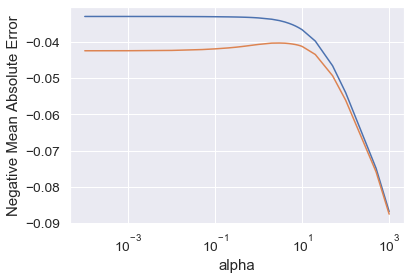

In [59]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.show()

- Best value of aplha is 10 for our model from above plot, We will analysis on different values of alpha

In [60]:
# Model 1st
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.9205178016770638
test R2  - 0.8625459403344315


In [61]:
# 2nd model on alpha = 100
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.8466998738725464
test R2  - 0.7944802136412573


In [62]:
# 3rd model on alpha =1
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  -" + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.9307096163288325
test R2  -0.8674204237008778


In [63]:
# 4th Test model on alpha = 0.1
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.9316807749633013
test R2  - 0.8660650272387537


In [64]:
# 5th model on alpha = 5
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.926090842802123
test R2  - 0.8666515838918718


In [65]:
# 6th model on alpha = 7 
from sklearn import metrics
# model with optimal alpha in ride regression
alpha = 7
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("train R2  - " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test R2  - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

train R2  - 0.9238321111247216
test R2  - 0.8651460520860951


In [66]:
print("No:of features - " + str(np.sum(ridge.coef_!=0)))

No:of features - 169


In [67]:
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [68]:
from operator import itemgetter
variables = sorted(list(zip(cols, ridge_model_parameters)),key=itemgetter(1))

for v in variables:
    if v[1] != 0 and abs(v[1]) > 0.01 :
        print(str(v[0]) + ' : ' + str(round(v[1],2)))

MSSubClass : -0.05
KitchenQual_TA : -0.04
BsmtQual_TA : -0.04
ExterQual_TA : -0.04
KitchenQual_Fa : -0.04
KitchenQual_Gd : -0.04
BsmtQual_Gd : -0.04
KitchenAbvGr : -0.04
Neighborhood_Edwards : -0.04
LotShape_IR3 : -0.03
YearRemodAdd : -0.03
Neighborhood_MeadowV : -0.03
Neighborhood_Mitchel : -0.03
BsmtQual_Fa : -0.03
Neighborhood_Gilbert : -0.02
Neighborhood_NWAmes : -0.02
YearBuilt : -0.02
ExterQual_Gd : -0.02
Neighborhood_IDOTRR : -0.02
Neighborhood_OldTown : -0.02
Exterior2nd_Stucco : -0.02
GarageType_CarPort : -0.02
LotConfig_FR2 : -0.02
Neighborhood_Sawyer : -0.02
Exterior1st_Wd Sdng : -0.02
FireplaceQu_No Fireplace : -0.02
Exterior2nd_Wd Shng : -0.02
BsmtExposure_No : -0.02
Neighborhood_NAmes : -0.02
FireplaceQu_Fa : -0.02
Neighborhood_CollgCr : -0.02
ExterCond_Gd : -0.02
BsmtExposure_No Basement Expo : -0.02
BsmtQual_No Basement Qual : -0.01
BsmtFinType1_No Basement Type1 : -0.01
FireplaceQu_Po : -0.01
BsmtHalfBath : -0.01
GarageFinish_RFn : -0.01
HouseStyle_2.5Fin : -0.01
BsmtF

# Lasso Regression

In [69]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [70]:
model_cv.best_params_

{'alpha': 0.0001}

In [81]:
model_cv.best_score_

-0.03998376324062801

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026402,0.010379,0.003218,0.002158,0.0001,{'alpha': 0.0001},-0.041193,-0.035101,-0.041818,-0.045983,...,-0.039984,0.004048,1,-0.033578,-0.035477,-0.033633,-0.031985,-0.035158,-0.033966,0.001256
1,0.012598,0.003384,0.002534,0.000598,0.001,{'alpha': 0.001},-0.046918,-0.039347,-0.043698,-0.050137,...,-0.044042,0.004077,2,-0.040228,-0.042656,-0.040678,-0.039368,-0.042171,-0.041020,0.001223
2,0.007163,0.001159,0.001700,0.000412,0.01,{'alpha': 0.01},-0.078266,-0.068745,-0.068832,-0.084077,...,-0.074010,0.006150,3,-0.071266,-0.073833,-0.072326,-0.072281,-0.072799,-0.072501,0.000833
3,0.004150,0.000867,0.001374,0.000387,0.05,{'alpha': 0.05},-0.143376,-0.126337,-0.138150,-0.156842,...,-0.138556,0.011108,4,-0.137883,-0.138997,-0.138488,-0.136717,-0.138855,-0.138188,0.000830
4,0.004431,0.001568,0.001735,0.000839,0.1,{'alpha': 0.1},-0.151529,-0.136172,-0.147702,-0.162475,...,-0.147302,0.009458,5,-0.145010,-0.150790,-0.148190,-0.141902,-0.149346,-0.147048,0.003200


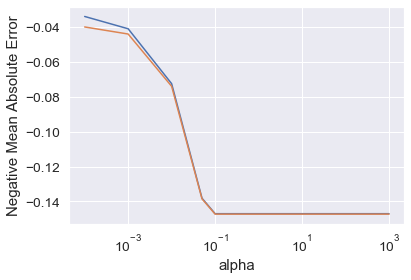

In [72]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.show()

In [73]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
# predict
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


In [74]:
print("train r2 -  " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test r2 - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("No:of features - " + str(np.sum(lasso.coef_!=0)))

train r2 -  0.8993175818415744
test r2 - 0.8549947312366216
No:of features - 55


In [75]:
alpha =0.0001

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train) 
# predict
y_train_pred = lasso1.predict(X_train)
y_test_pred = lasso1.predict(X_test)



In [76]:
print("train r2 -  " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))
print("test r2 - " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))
print("No:of features - " + str(np.sum(lasso1.coef_!=0)))

train r2 -  0.9276303149526108
test r2 - 0.8699187429459012
No:of features - 105


In [77]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [78]:
from operator import itemgetter

variables = sorted(list(zip(cols, lasso_model_parameters)),key=itemgetter(1))

for v in variables:
    if v[1] != 0 and abs(v[1]) > 0.01 :
        print(str(v[0]) + ' : ' + str(round(v[1],2)))

MSSubClass : -0.04
YearRemodAdd : -0.04
ExterQual_TA : -0.03
KitchenAbvGr : -0.02
KitchenQual_Gd : -0.02
KitchenQual_TA : -0.02
FireplaceQu_No Fireplace : -0.02
YearBuilt : -0.01
BsmtExposure_No : -0.01
BsmtQual_Gd : -0.01
BsmtQual_TA : -0.01
MasVnrArea : 0.01
Foundation_PConc : 0.01
Exterior1st_BrkFace : 0.01
HalfBath : 0.02
FullBath : 0.02
GarageType_BuiltIn : 0.02
LotConfig_CulDSac : 0.02
WoodDeckSF : 0.02
LotArea : 0.02
BsmtExposure_Gd : 0.02
Neighborhood_Crawfor : 0.03
Neighborhood_NoRidge : 0.03
Functional_Typ : 0.03
OverallCond : 0.03
SaleCondition_Partial : 0.03
Neighborhood_StoneBr : 0.03
constant : 0.04
Neighborhood_NridgHt : 0.06
GarageArea : 0.08
BsmtFinSF1 : 0.09
2ndFlrSF : 0.14
OverallQual : 0.21
1stFlrSF : 0.25
